In [1]:

#@Author :Lenka Sai Surya Sashank
#Date : 01-09-2021
#Version
#Tensorflow
#Keras
#Python 3.7.6
#Pandas == 1.0.5
#Numpy  == 1.20.2
#seaborn == 0.10.0
#sklearn == 0.22.1

#Please use it for reference , Donot copy paste  :')

# Small Image Classification Using Convolutional Neural Network (CNN)

### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

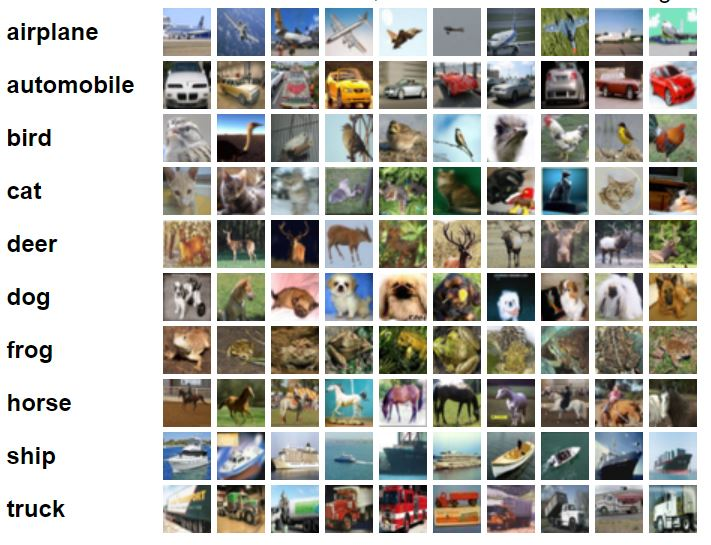

In [11]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

##### Load the dataset

In [13]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [15]:
y_train.shape

(50000, 1)

In [16]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']




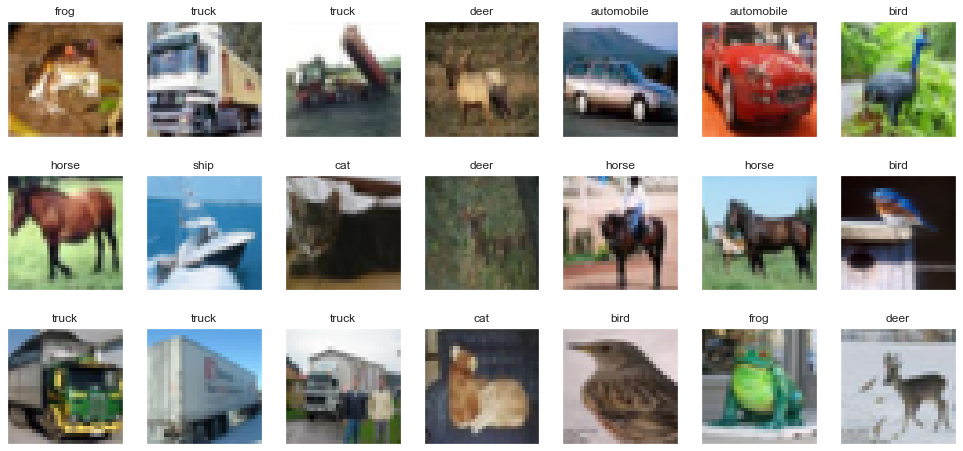

In [17]:
# Display the first 21 images of X_train
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [18]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

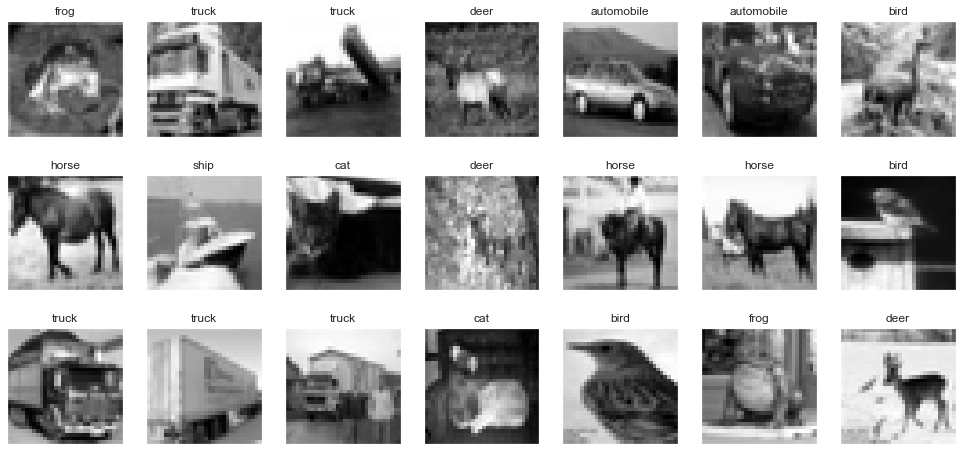

In [19]:
# Display the first 21 images of X_train (grayscale)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Normalizing the data

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)



In [22]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [23]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [24]:
# Defining input shape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [25]:
# Constructing CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [26]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 177s 113ms/step - loss: 1.7930 - acc: 0.3302 - val_loss: 1.3937 - val_acc: 0.5007
Epoch 2/20
1563/1563 [==============================] - 166s 106ms/step - loss: 1.3502 - acc: 0.5204 - val_loss: 1.2420 - val_acc: 0.5733
Epoch 3/20
1563/1563 [==============================] - 164s 105ms/step - loss: 1.1677 - acc: 0.5886 - val_loss: 1.0646 - val_acc: 0.6337
Epoch 4/20
1563/1563 [==============================] - 171s 109ms/step - loss: 1.0482 - acc: 0.6373 - val_loss: 0.9961 - val_acc: 0.6565
Epoch 5/20
1563/1563 [==============================] - 175s 112ms/step - loss: 0.9560 - acc: 0.6708 - val_loss: 0.9776 - val_acc: 0.6634
Epoch 6/20
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8809 - acc: 0.6971 - val_loss: 0.9814 - val_acc: 0.6595
Epoch 7/20
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8171 - acc: 0.7182 - val_loss: 0.9666 - val_acc: 0.6775
Epoch 8/20
1563/1563 [============

In [27]:
# Saving/loading model
model.save('CNN_CIFAR.h5')
model = load_model('CNN_CIFAR.h5')

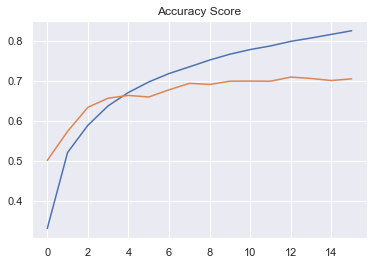

In [28]:
# Model evaluation
plt.title('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()



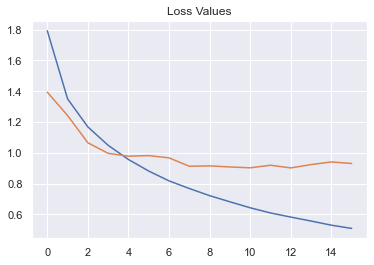

In [29]:
plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [30]:
# Predicting test data
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

In [31]:
y_test = one_hot_encoder.inverse_transform(y_test)

In [32]:
# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)



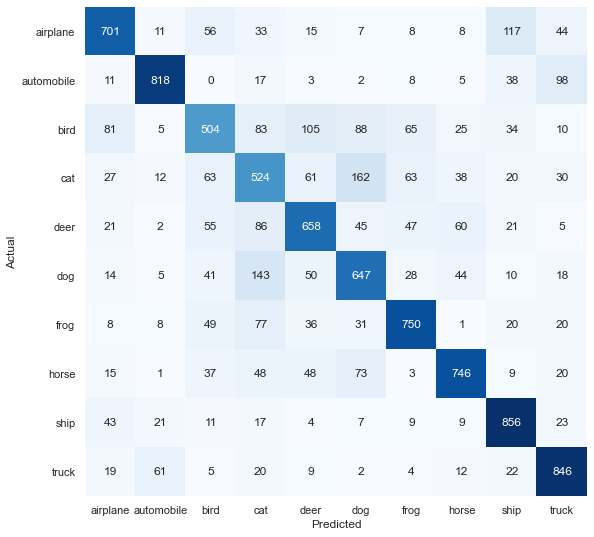

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Displaying test data with its actual and predicted label
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [35]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

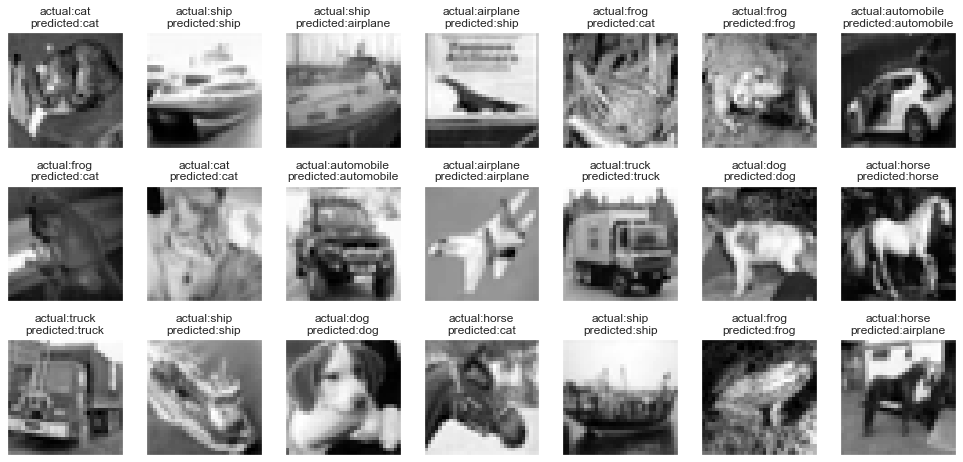

In [36]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

## Result:Image Classification Using Convolutional Neural Network (CNN) is performed